# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import path

out_path = 'Output'

In [3]:
# I use firefox with geckodriver, so I changed this.
# Change to 'chrome' if you prefer chromedriver instead. Everything should work more or less the same.
browser = Browser('firefox')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
soup = bs(browser.html, 'html.parser')

In [7]:
# Extract all rows of data
scraped_rows = soup.find_all('tr', class_='data-row')
scraped_rows[0]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# column names generated dynamically
headers = [h.text.strip() for h in soup.find('tbody').find_all('th')]
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
# (doing a 2-for-1 with nested list comprehension)

# Loop through the scraped data to create a list of rows
data_rows = [[item.text.strip() for item in row.find_all('td')] for row in scraped_rows]

# get header to make sure we're doing this properly
[data_rows[i] for i in range(5)]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_df = pd.DataFrame(data_rows, columns=headers)

In [11]:
# Confirm DataFrame was created successfully
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
data_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
data_df_typed = data_df.astype({
    'id': 'int',
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int',
    'ls': 'int',
    'month': 'int',
    'min_temp': 'float64',
    'pressure': 'float64'
})

In [14]:
# Confirm type changes were successful by examining data types again
data_df_typed.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
data_df_typed['month'].max()

12

In [16]:
# 1. How many months are there on Mars?
# I don't know what this question is asking for, 
# but this the best I could do to match the sample output

mars_by_month = data_df_typed.groupby('month')

mars_by_month['month'].count()
# I guess the answer is that there are 12 months in a Martian year?

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [17]:
# 2. How many Martian days' worth of data are there?
print('No. of Martian days in the data:', len(data_df_typed['sol'].unique()))

# Called the .unique() just to make sure there are no duplicate days in the data.

No. of Martian days in the data: 1867


In [18]:
# 3. What is the average low temperature by month?
min_temp_avg = mars_by_month['min_temp'].mean()

min_temp_avg

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

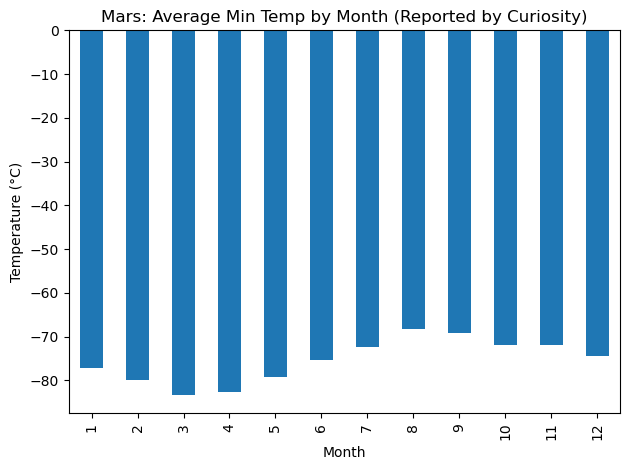

In [19]:
# Plot the average temperature by month
min_temp_avg.plot(kind='bar')
plt.title('Mars: Average Min Temp by Month (Reported by Curiosity)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.savefig(path.join(out_path, 'Min Temperature - Avg by Month'))
plt.show()

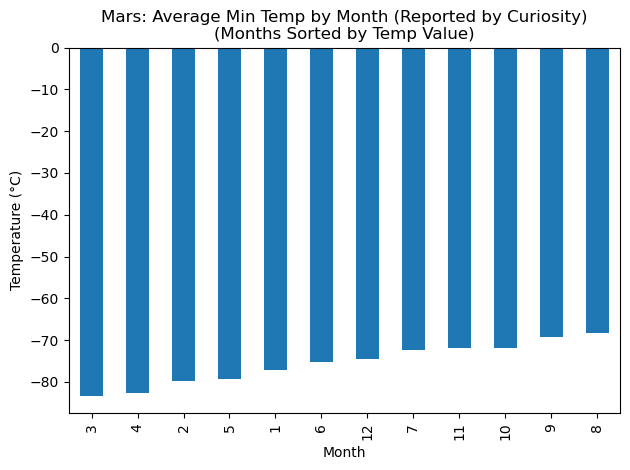

In [20]:
# Identify the coldest and hottest months in Curiosity's location
min_temp_avg_sorted = min_temp_avg.sort_values()

min_temp_avg_sorted.plot(kind='bar')
plt.title('Mars: Average Min Temp by Month (Reported by Curiosity)\n(Months Sorted by Temp Value)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.savefig(path.join(out_path, 'Min Temperature - Avg by Month - Sorted Asc'))
plt.show()

In [21]:
# 4. Average pressure by Martian month
press_avg = mars_by_month['pressure'].mean()
press_avg

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

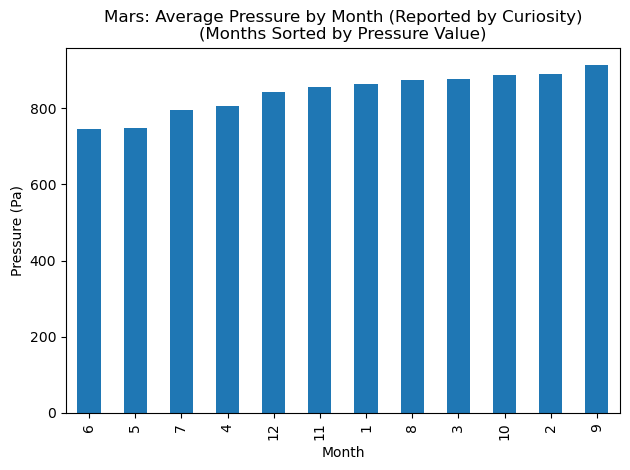

In [22]:
# Plot the average pressure by month
press_avg.sort_values().plot(kind='bar')
plt.title('Mars: Average Pressure by Month (Reported by Curiosity)\n(Months Sorted by Pressure Value)')
plt.xlabel('Month')
# Units were confirmed by visiting one of the supporting links on the webpage
plt.ylabel('Pressure (Pa)')

plt.tight_layout()
plt.savefig(path.join(out_path, 'Pressure - Avg by Month - Sorted Asc'))
plt.show()

In [23]:
min_temp_series = data_df_typed.set_index('sol')['min_temp']

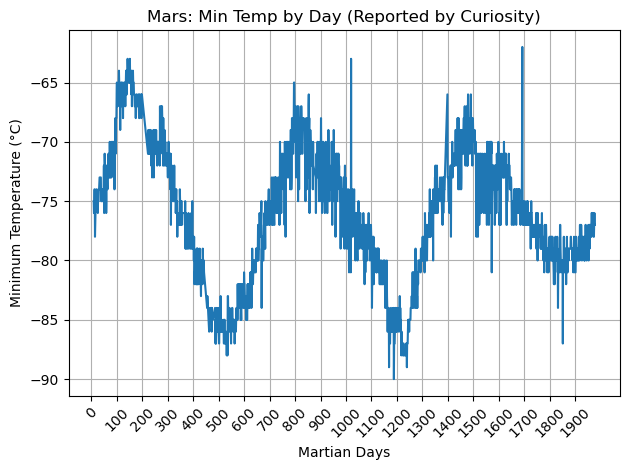

In [24]:
# 5. How many terrestrial (earth) days are there in a Martian year?
min_temp_series.plot(kind='line')
plt.title('Mars: Min Temp by Day (Reported by Curiosity)')
plt.xlabel('Martian Days')
plt.ylabel('Minimum Temperature (°C)')

# I decided to add gridlines and cluster the xticks to make eyeballing year length easier
plt.xticks(np.arange(0, 2000, 100), rotation=45)
plt.grid()

plt.tight_layout()
plt.savefig(path.join(out_path, 'Min Temperature - By Day'))
plt.show()

In [25]:
# (Just for fun, this is entirely over the top and unnecessary)
# Some automated analysis with manually-entered values:

# eyeballed values (non scientifically rigorous) for peaks and troughs
p_t = {'peaks': [525, 1190, 1850],
       'troughs': [140, 820, 1480]}
period_observation = []

# For each of my peaks and troughs values:
# Iterate through items in the list, get the difference between each sequential item
# n-1 times
# and print out the results
for key in p_t.keys():
    item_no = len(p_t[key])
    print(f'No. of items in {key}: {item_no}')
    for i in range(item_no - 1):
        days = p_t[key][i+1] - p_t[key][i]
        print(f'{p_t[key][i]} to {p_t[key][i+1]}: {days} Days')
        period_observation.append(days)

# average all of these differences together
# to get a more rounded year estimate
print(f'The average of these differences is {np.mean(period_observation)} Days')

No. of items in peaks: 3
525 to 1190: 665 Days
1190 to 1850: 660 Days
No. of items in troughs: 3
140 to 820: 680 Days
820 to 1480: 660 Days
The average of these differences is 666.25 Days


Analysis cells below were pre-filled, but I deleted them so they could be rewritten.

# Analysis
***
## Warmest and Coldest Months
According to the data collected by Curiosity, the warmest Martian Months (on average) appear to be 8 and 9, and the coldest months 3 and 4, respectively, out of the 12. This is according to minimum daily temperatures only, so our graph may not paint a complete picture of Martian temperature profiles.

## Highest and Lowest Pressure Months
On average, the months with the highest pressure on Mars are 9 and 2, whereas the lowest pressure months are 6 and 5 (again, respectively) in the dataset.

## Number of Earth days in Martian year
On the graph above, we can see about 3 peaks and 3 troughs in the data. 
Eyeballing the peak to peak and trough to trough values (and ignoring outliers), we get rough numbers as follows:

Trough to Trough:
* 1190 - 525 = 665
* 1850 - 1190 = 660

Peak to Peak:
* 820 - 140 = 680
* 1480 - 820 = 660

Averaging these together, we get 666.25 estimated Earth days in a Martian year. Fact-checking this against a cursory google search, NASA states that a Mars Year is 687 Earth Days, so we are fairly close. Perhaps a more data-driven analysis on the temperature values or a larger sample size would have yielded us a more accurate figure.

It's also possible that our data is inconsistent in its periodicity due to the Curiosity Rover moving around over time and collecting temperatures for different areas over its lifetime.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
data_df_typed.to_csv(path.join(out_path, 'mars_data_scraped.csv'), index=False, header=True)

In [27]:
browser.quit()